In [ ]:
 ! pip install -q kaggle

In [ ]:
! kaggle datasets download -d gpiosenka/100-bird-species

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhayishere1","key":"2b0a44ed900c67c36612cd5161c4452e"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              232KB  2021-06-30 11:37:00           8626  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5267  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1846  
promptcloud/careerbuilder-job-listing-2020                    Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52           1216  
coloradokb/dandelionimages                                    Da

In [ ]:
! kaggle datasets download -d gpiosenka/100-bird-species

 97% 863M/889M [00:05<00:00, 118MB/s]
100% 889M/889M [00:05<00:00, 161MB/s]


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-01 08:34:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-01 08:34:59 (115 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data


In [ ]:
unzip_data("100-bird-species.zip")

In [ ]:
train_dir = "train/"
test_dir = "test/"
valid_dir = "valid/"

In [ ]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=(224,224))
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=(224,224),
                                                                shuffle=False)
valid_data = tf.keras.preprocessing.image_dataset_from_directory(valid_dir,
                                                                 label_mode="categorical",
                                                                 image_size=(224,224))

Found 39364 files belonging to 275 classes.
Found 1375 files belonging to 275 classes.
Found 1375 files belonging to 275 classes.


In [ ]:
model = tf.keras.applications.EfficientNetB0(include_top=False)

model.trainable=False

inputs = tf.keras.layers.Input(shape=(224,224,3))

x = model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(len(train_data.class_names),activation="softmax")(x)

model_final = tf.keras.Model(inputs,outputs)

model_final.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

history = model_final.fit(train_data,
                          epochs=5,
                          steps_per_epoch = len(train_data),
                          validation_data=valid_data,
                          validation_steps=len(valid_data))

Epoch 1/5
1231/1231 [==============================] - 117s 91ms/step - loss: 1.1194 - accuracy: 0.8215 - val_loss: 0.1950 - val_accuracy: 0.9673
Epoch 2/5
1231/1231 [==============================] - 111s 90ms/step - loss: 0.2611 - accuracy: 0.9491 - val_loss: 0.1150 - val_accuracy: 0.9760
Epoch 3/5
1231/1231 [==============================] - 110s 89ms/step - loss: 0.1623 - accuracy: 0.9684 - val_loss: 0.0891 - val_accuracy: 0.9811
Epoch 4/5
1231/1231 [==============================] - 110s 89ms/step - loss: 0.1139 - accuracy: 0.9788 - val_loss: 0.0796 - val_accuracy: 0.9811
Epoch 5/5
1231/1231 [==============================] - 110s 89ms/step - loss: 0.0830 - accuracy: 0.9859 - val_loss: 0.0739 - val_accuracy: 0.9811


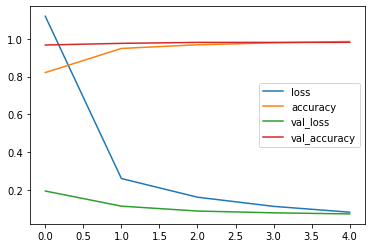

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  print(np.argmax(pred))
  print
  pred_class = class_names[np.argmax(pred)]
  print(pred_class)
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model_final,"/content/QUETZAL.jpg",test_data.class_names)

[[7.94663446e-09 9.93310005e-06 8.77855288e-10 1.39808503e-03
  8.34819436e-10 2.20289897e-09 2.61637156e-09 2.93970288e-07
  9.23478183e-09 2.08607762e-08 3.86480963e-08 5.67619285e-09
  9.64866331e-07 1.08079945e-07 1.57916725e-06 1.89584938e-07
  1.58941553e-08 2.91773250e-09 8.51649489e-08 1.47541911e-07
  2.18476112e-06 6.63765150e-08 2.34325803e-08 1.12937346e-06
  1.52929897e-06 5.29759973e-07 8.87567876e-05 1.11917631e-09
  1.22030272e-07 2.50621724e-06 7.66935315e-08 1.15661727e-07
  5.25802086e-08 7.72197453e-08 1.56837139e-08 3.01155145e-09
  1.49255172e-07 1.46363233e-08 2.65810160e-12 1.93176621e-08
  9.35721379e-12 5.63657991e-08 1.75274444e-08 1.05554063e-08
  3.18562456e-08 6.09911222e-04 8.16374377e-04 3.06413872e-09
  1.87894784e-07 7.86077123e-08 1.29745770e-09 7.38458183e-08
  9.29028632e-10 1.34789060e-08 3.26736449e-06 5.20076128e-07
  5.91499933e-08 5.96944756e-06 6.21930667e-08 2.15937476e-07
  9.30605260e-10 2.81173129e-09 1.25534150e-09 1.09696138e-07
  6.1454

'QUETZAL'

In [ ]:
pred_probs = model_final.predict(test_data, verbose=1)

43/43 [==============================] - 2s 56ms/step


In [ ]:
pred_probs.shape


(1375, 275)

In [ ]:
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
print(pred_classes[:10])
cnt=0
for images,labels in test_data.unbatch():
  cnt+=1
  if cnt==11:
    break
  print(labels.numpy().argmax())

[0 0 0 0 0 1 1 1 1 1]
0
0
0
0
0
1
1
1
1
1


In [ ]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.992

In [ ]:
model_final.save("bird_classifier_model.h5")